<a href="https://colab.research.google.com/github/ddubey4747/Data-Science/blob/main/CNN_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers , Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [7]:
train_images = train_images.reshape((-1 , 28*28))
test_images = test_images.reshape((-1 , 28*28))


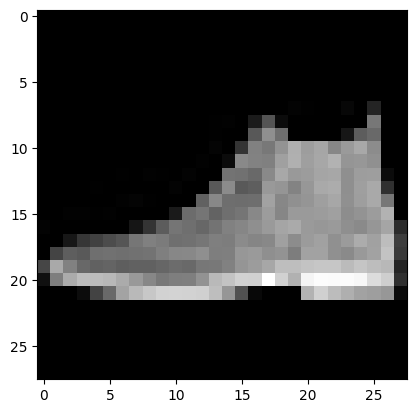

In [8]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(test_images[0], (28, 28)), cmap='gray')
plt.show()

In [9]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2 , verbose=1)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5154 - accuracy: 0.8213 - val_loss: 0.4036 - val_accuracy: 0.8593
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3854 - accuracy: 0.8610 - val_loss: 0.3892 - val_accuracy: 0.8611
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3454 - accuracy: 0.8734 - val_loss: 0.3643 - val_accuracy: 0.8688
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3186 - accuracy: 0.8820 - val_loss: 0.3431 - val_accuracy: 0.8773
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3011 - accuracy: 0.8900 - val_loss: 0.3285 - val_accuracy: 0.8817
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2829 - accuracy: 0.8945 - val_loss: 0.3540 - val_accuracy: 0.8717
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2712 - accuracy: 0.8999 - val_loss: 0.3126 - val_accuracy:

In [12]:
model.predict(np.expand_dims(test_images[0] , axis=0))

1/1 [==============================] - 0s 74ms/step


array([[3.6415056e-08, 6.1581878e-11, 1.6622599e-07, 6.3708590e-09,
        2.1138857e-09, 9.3864463e-04, 7.1212179e-07, 3.2968558e-03,
        3.1893906e-06, 9.9576038e-01]], dtype=float32)

In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to flatten them
train_images = train_images.reshape((-1, 28 * 28))
test_images = test_images.reshape((-1, 28 * 28))

# Define the ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=50, validation_split=0.2)


Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5222 - accuracy: 0.8178 - val_loss: 0.4185 - val_accuracy: 0.8471
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3910 - accuracy: 0.8604 - val_loss: 0.3874 - val_accuracy: 0.8647
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3483 - accuracy: 0.8738 - val_loss: 0.3499 - val_accuracy: 0.8758
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3216 - accuracy: 0.8823 - val_loss: 0.3472 - val_accuracy: 0.8724
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3027 - accuracy: 0.8897 - val_loss: 0.3429 - val_accuracy: 0.8743
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2885 - accuracy: 0.8933 - val_loss: 0.3372 - val_accuracy: 0.8773
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2736 - accuracy: 0.8992 - val_loss: 0.3574 - val_accuracy:

In [14]:
tf.argmax(model.predict(test_images[1:10]))

1/1 [==============================] - 0s 48ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([3, 1, 0, 3, 5, 7, 6, 8, 3, 3])>

In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model



170498071/170498071 [==============================] - 2s 0us/step


In [27]:
x_train = x_train.reshape((-1,32,32,3))
x_test = x_test.reshape((-1,32,32,3))

In [46]:
model = Sequential([
  # Convolutional layer
  Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
  MaxPooling2D((2, 2)),
  layers.BatchNormalization(),

  # # # Second convolutional layer
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  layers.BatchNormalization(),

  # # # Third convolutional layer
  Conv2D(64, (3, 3), activation='relu'),
  layers.BatchNormalization(),
  # # # Flatten the output of the convolutional layers
  Flatten(),

  # Dense layers for classification
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation = 'relu' ),


  Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test) , verbose = 2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

Epoch 1/15
1563/1563 - 20s - loss: 1.3529 - accuracy: 0.5160 - val_loss: 1.2127 - val_accuracy: 0.5702 - 20s/epoch - 13ms/step
Epoch 2/15
1563/1563 - 18s - loss: 0.9608 - accuracy: 0.6628 - val_loss: 1.0302 - val_accuracy: 0.6403 - 18s/epoch - 12ms/step
Epoch 3/15
1563/1563 - 18s - loss: 0.7940 - accuracy: 0.7205 - val_loss: 1.0627 - val_accuracy: 0.6374 - 18s/epoch - 12ms/step
Epoch 4/15
1563/1563 - 18s - loss: 0.6917 - accuracy: 0.7572 - val_loss: 0.9068 - val_accuracy: 0.6968 - 18s/epoch - 12ms/step
Epoch 5/15
1563/1563 - 18s - loss: 0.6073 - accuracy: 0.7873 - val_loss: 0.8772 - val_accuracy: 0.7034 - 18s/epoch - 12ms/step
Epoch 6/15
1563/1563 - 18s - loss: 0.5329 - accuracy: 0.8132 - val_loss: 0.8224 - val_accuracy: 0.7293 - 18s/epoch - 12ms/step
Epoch 7/15
1563/1563 - 18s - loss: 0.4696 - accuracy: 0.8333 - val_loss: 0.9002 - val_accuracy: 0.7185 - 18s/epoch - 12ms/step
Epoch 8/15
1563/1563 - 18s - loss: 0.4142 - accuracy: 0.8529 - val_loss: 1.5645 - val_accuracy: 0.6003 - 18s/ep

In [18]:
x_test.shape

(10000, 32, 32, 3)

In [47]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2045 - accuracy: 0.7193


[1.2045485973358154, 0.7192999720573425]

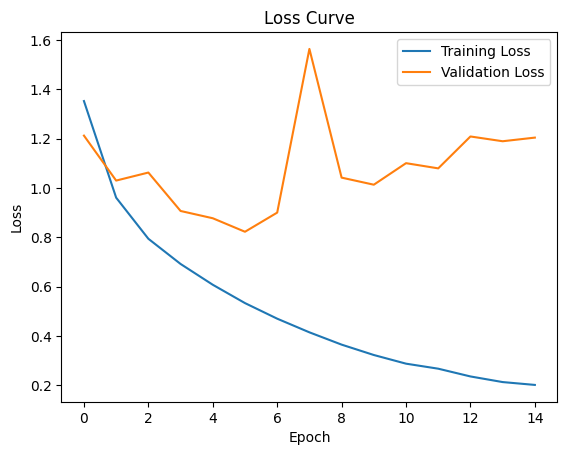

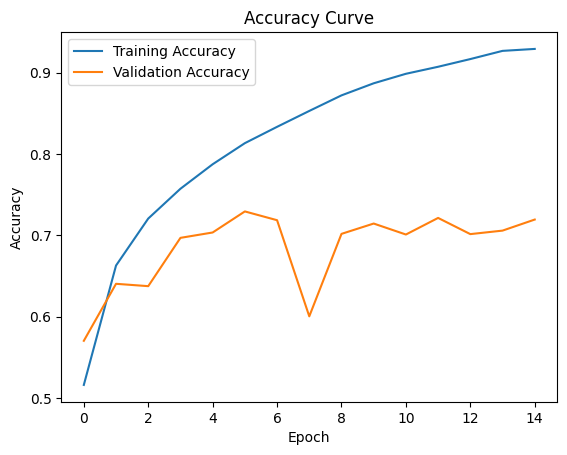

In [48]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.show()

# Plot the accuracy curve
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.show()

In [49]:
model.predict(np.expand_dims(x_test[0], axis=0))

1/1 [==============================] - 0s 112ms/step


array([[2.4929830e-06, 9.7610946e-06, 9.8804976e-06, 9.9829859e-01,
        1.6187589e-05, 4.9967674e-04, 5.7847903e-04, 5.7239525e-08,
        5.8206724e-04, 2.8389909e-06]], dtype=float32)

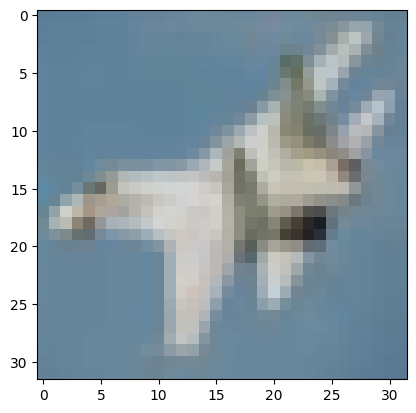

In [52]:
plt.imshow(x_test[10])

In [45]:
model.evaluate(x_test ,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1492 - accuracy: 0.7008


[1.149196743965149, 0.7008000016212463]

In [3]:
import tensorflow as tf

class ResNetDWide(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(ResNetDWide, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(16, (3, 3), padding='same')
        self.dense_block1 = self._build_dense_block(32, 3)
        self.transition1 = self._build_transition_layer(32)
        self.dense_block2 = self._build_dense_block(64, 6)
        self.transition2 = self._build_transition_layer(64)
        self.dense_block3 = self._build_dense_block(128, 12)
        self.bn = tf.keras.layers.BatchNormalization()
        self.linear = tf.keras.layers.Dense(num_classes)

    def _build_dense_block(self, num_filters, num_layers):
        block = tf.keras.Sequential()
        for _ in range(num_layers):
            block.add(tf.keras.layers.Conv2D(num_filters, (3, 3), padding='same'))
            block.add(tf.keras.layers.BatchNormalization())
            block.add(tf.keras.layers.Activation('relu'))
            block.add(tf.keras.layers.Dropout(0.3))
        return block

    def _build_transition_layer(self, num_filters):
        return tf.keras.Sequential([
            tf.keras.layers.Conv2D(num_filters, (3, 3), strides=2, padding='same'),
            tf.keras.layers.BatchNormalization()
        ])

    def call(self, inputs, training=False):
        x = self.conv1(inputs)
        x = self.dense_block1(x)
        x = self.transition1(x)
        x = self.dense_block2(x)
        x = self.transition2(x)
        x = self.dense_block3

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [12]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [13]:
model = ResNetDWide()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:361: UserWarning: `build()` was called on layer 'res_net_d_wide_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


ValueError: None values not supported.

In [15]:
print(f"Number of missing values in x_train: {np.count_nonzero(np.isnan(x_train))}")
print(f"Number of missing values in y_train: {np.count_nonzero(np.isnan(y_train))}")
print(f"Number of missing values in x_test: {np.count_nonzero(np.isnan(x_test))}")
print(f"Number of missing values in y_test: {np.count_nonzero(np.isnan(y_test))}")

Number of missing values in x_train: 0
Number of missing values in y_train: 0
Number of missing values in x_test: 0
Number of missing values in y_test: 0


In [16]:
# Check if data preprocessing steps are appropriate
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)
